In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
dataset.sample(5)


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2162,2162,20,RL,11778,Inside,1Fam,5,2008,2008,VinylSd,0.0,1751.0,NaN
954,954,90,RL,9400,CulDSac,Duplex,5,1975,1975,WdShing,0.0,945.0,127500.0
443,443,120,RL,3922,Inside,TwnhsE,5,2006,2007,WdShing,0.0,1258.0,172500.0
716,716,70,RM,10800,Inside,1Fam,8,1890,1998,Wd Sdng,0.0,718.0,159500.0
2861,2861,60,RL,7162,Inside,1Fam,5,2003,2004,HdBoard,0.0,796.0,NaN


In [10]:
dataset.shape

(2919, 13)

In [11]:
dataset.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [13]:
dataset.dtypes.value_counts()

int64      6
object     4
float64    3
Name: count, dtype: int64

In [14]:
print(dataset.isnull().sum())  # Shows the count of missing values per column

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


In [15]:
dataset.drop(columns=['Id'], inplace=True)

In [16]:
dataset

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [17]:
dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])


In [18]:
dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(dataset['BsmtFinSF2'].median())
dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(dataset['TotalBsmtSF'].median())

In [19]:
train_dataset = dataset[dataset['SalePrice'].notnull()]
test_dataset = dataset[dataset['SalePrice'].isnull()].drop(columns=['SalePrice'])


In [20]:
dataset

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [21]:
print(train_dataset.isnull().sum())  # Shows the count of missing values per column


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64


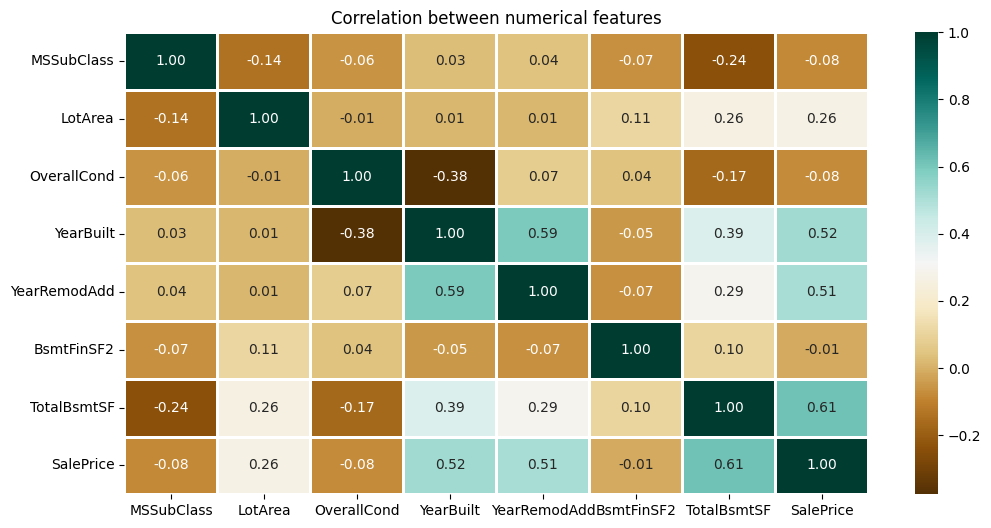

In [22]:
# Select only numerical features for correlation analysis
numerical_dataset = train_dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)
plt.title('Correlation between numerical features');

In [27]:
categorical_cols = train_dataset.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
train_dataset = pd.get_dummies(train_dataset, columns=categorical_cols)

# Display the first few rows of the transformed DataFrame
for col in train_dataset.columns:
    if train_dataset[col].dtype == 'bool':
        train_dataset[col] = train_dataset[col].astype(int)

# Display the first few rows
train_dataset.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
from sklearn.model_selection import train_test_split

# Assuming 'train_dataset' is your DataFrame with SalePrice

# Separate features (X) and target (y)
X = train_dataset.drop('SalePrice', axis=1)  # Features
y = train_dataset['SalePrice']  # Target

# Perform train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, y_train: Training data
# X_val, y_val: Validation data

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def train_and_evaluate_models(train_dataset):
    """
    Trains and evaluates various regression models on the given dataset.

    Args:
        train_dataset (pandas.DataFrame): The training dataset.
    """

    # Separate features and target
    X = train_dataset.drop('SalePrice', axis=1)
    y = train_dataset['SalePrice']

    # Perform train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
        'Random Forest Regression': RandomForestRegressor(random_state=42),
        'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
        'SVR': SVR(),
        'KNN Regression': KNeighborsRegressor(),
        'Neural Network Regression': MLPRegressor(random_state=42, max_iter=500)
    }

    # Train and evaluate models
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, y_pred)
        results[name] = {'RMSE': rmse, 'R2': r2}

    # Display results
    print("Model Evaluation Results:")
    for name, metrics in results.items():
        print(f"{name}: RMSE = {metrics['RMSE']:.2f}, R2 = {metrics['R2']:.4f}")

# Example usage (assuming 'train_dataset' is your pandas DataFrame):
# Replace 'train_dataset' with your actual DataFrame name.
train_and_evaluate_models(train_dataset)

C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.709e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Model Evaluation Results:
Linear Regression: RMSE = 54022.75, R2 = 0.6195
Ridge Regression: RMSE = 54052.99, R2 = 0.6191
Lasso Regression: RMSE = 54023.08, R2 = 0.6195
Decision Tree Regression: RMSE = 51902.95, R2 = 0.6488
Random Forest Regression: RMSE = 37285.53, R2 = 0.8188
Gradient Boosting Regression: RMSE = 35950.43, R2 = 0.8315
SVR: RMSE = 88653.81, R2 = -0.0247
KNN Regression: RMSE = 60517.15, R2 = 0.5225
Neural Network Regression: RMSE = 66329.62, R2 = 0.4264


C:\Users\Ash\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'train_dataset' is your pandas DataFrame

# Separate features and target
X = train_dataset.drop('SalePrice', axis=1)
y = train_dataset['SalePrice']

# Perform train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None, 0.7, 0.8, 0.9]  # Corrected hyperparameter
}

# Create Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error'
)

random_search.fit(X_train, y_train)

# Get best model and predictions
best_gbr = random_search.best_estimator_
y_pred = best_gbr.predict(X_val)

# Evaluate performance
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"Best Gradient Boosting Model: RMSE = {rmse:.2f}, R2 = {r2:.4f}")
print("Best Hyperparameters:", random_search.best_params_)

Best Gradient Boosting Model: RMSE = 34679.42, R2 = 0.8432
Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.05}


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Assuming 'train_dataset' and 'test_dataset' are your pandas DataFrames

# Separate features and target from train_dataset
X_train_full = train_dataset.drop('SalePrice', axis=1)
y_train_full = train_dataset['SalePrice']

# Scale features (important for some models and optimization)
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
test_dataset_scaled = scaler.transform(test_dataset)

# Perform train-validation split from the full training set
X_train, X_val, y_train, y_val = train_test_split(X_train_full_scaled, y_train_full, test_size=0.2, random_state=42)

# 1. Expanded Hyperparameter Grid (RandomizedSearchCV)
param_dist_expanded = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None, 0.6, 0.7, 0.8, 0.9]
}

gbr_random = GradientBoostingRegressor(random_state=42)
random_search_expanded = RandomizedSearchCV(
    estimator=gbr_random,
    param_distributions=param_dist_expanded,
    n_iter=150,  # Increased n_iter
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error'
)
random_search_expanded.fit(X_train, y_train)

best_gbr_random = random_search_expanded.best_estimator_
y_pred_random = best_gbr_random.predict(X_val)
rmse_random = np.sqrt(mean_squared_error(y_val, y_pred_random))
r2_random = r2_score(y_val, y_pred_random)

print("RandomizedSearchCV (Expanded): RMSE =", rmse_random, ", R2 =", r2_random)
print("Best Params (Randomized):", random_search_expanded.best_params_)

# 2. GridSearchCV (Example - smaller grid for demonstration)
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 5, 6]
}

gbr_grid = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=gbr_grid,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)

best_gbr_grid = grid_search.best_estimator_
y_pred_grid = best_gbr_grid.predict(X_val)
rmse_grid = np.sqrt(mean_squared_error(y_val, y_pred_grid))
r2_grid = r2_score(y_val, y_pred_grid)

print("\nGridSearchCV: RMSE =", rmse_grid, ", R2 =", r2_grid)
print("Best Params (Grid):", grid_search.best_params_)

# 3. Train on the full train_dataset with best parameters (from either Randomized or Grid)
best_model = random_search_expanded.best_estimator_ # Or grid_search.best_estimator_

best_model.fit(X_train_full_scaled, y_train_full)

# 4. Make predictions on the test_dataset
test_predictions = best_model.predict(test_dataset_scaled)

# Create a submission DataFrame (adjust 'Id' column name if needed)
submission = pd.DataFrame({'Id': test_dataset.index, 'SalePrice': test_predictions})

# Display the submission DataFrame
print(submission)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BldgType
- Exterior1st
- LotConfig
- MSZoning
Feature names seen at fit time, yet now missing:
- BldgType_1Fam
- BldgType_2fmCon
- BldgType_Duplex
- BldgType_Twnhs
- BldgType_TwnhsE
- ...


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'train_dataset' and 'test_dataset' are your pandas DataFrames

# Separate target from train_dataset
y_train_full = train_dataset['SalePrice']

# Combine train and test datasets (excluding 'SalePrice' from train)
combined_data = pd.concat([train_dataset.drop('SalePrice', axis=1), test_dataset], ignore_index=True)

# Identify categorical and numerical columns
categorical_cols = combined_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = combined_data.select_dtypes(exclude=['object']).columns.tolist()

# Create ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the combined data
combined_processed = preprocessor.fit_transform(combined_data)

# Split back into train and test
X_train_full_processed = combined_processed[:len(train_dataset)]
test_dataset_processed = combined_processed[len(train_dataset):]

# Perform train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train_full_processed, y_train_full, test_size=0.2, random_state=42)

# 1. Expanded Hyperparameter Grid (RandomizedSearchCV)
param_dist_expanded = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None, 0.6, 0.7, 0.8, 0.9]
}

gbr_random = GradientBoostingRegressor(random_state=42)
random_search_expanded = RandomizedSearchCV(
    estimator=gbr_random,
    param_distributions=param_dist_expanded,
    n_iter=150,  # Increased n_iter
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error'
)
random_search_expanded.fit(X_train, y_train) # Make sure this line is executed

best_gbr_random = random_search_expanded.best_estimator_
y_pred_random = best_gbr_random.predict(X_val)
rmse_random = np.sqrt(mean_squared_error(y_val, y_pred_random))
r2_random = r2_score(y_val, y_pred_random)

print("RandomizedSearchCV (Expanded): RMSE =", rmse_random, ", R2 =", r2_random)
print("Best Params (Randomized):", random_search_expanded.best_params_)

RandomizedSearchCV (Expanded): RMSE = 33472.44913533659 , R2 = 0.8539299606230735
Best Params (Randomized): {'subsample': 0.8, 'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.9, 'max_depth': 7, 'learning_rate': 0.01}
